In [ ]:
import os
import numpy as np
from matplotlib import pyplot

In [ ]:
# Leer datos
data = np.loadtxt('datasets/day.csv', delimiter=',')
X, y = data[:, :15], data[:,15]
m = y.size

In [ ]:
X.shape

(730, 15)

In [ ]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.0000000e+00 2.0180000e+03 1.0000000e+00 ... 1.0749882e+07
  3.3100000e+02 6.5400000e+02]
 [2.0000000e+00 2.0180000e+03 1.0000000e+00 ... 1.6652113e+07
  1.3100000e+02 6.7000000e+02]
 [3.0000000e+00 2.0180000e+03 1.0000000e+00 ... 1.6636703e+07
  1.2000000e+02 1.2290000e+03]
 ...
 [7.2800000e+02 2.0190000e+03 1.0000000e+00 ... 8.3336610e+06
  1.5900000e+02 1.1820000e+03]
 [7.2900000e+02 2.0190000e+03 1.0000000e+00 ... 2.3500518e+07
  3.6400000e+02 1.4320000e+03]
 [7.3000000e+02 2.0190000e+03 1.0000000e+00 ... 1.0374682e+07
  4.3900000e+02 2.2900000e+03]]
Media calculada: [3.65500000e+02 2.01850000e+03 2.49863014e+00 5.00000000e-01
 6.52602740e+00 2.87671233e-02 2.99726027e+00 6.83561644e-01
 1.39452055e+00 1.42119943e+07 1.32792717e+06 4.41476788e+05
 1.51557510e+07 8.49249315e+02 3.65875753e+03]
Desviación estandar calculada: [2.10732651e+02 5.00000000e-01 1.10942329e+00 5.00000000e-01
 3.44785132e+00 1.67151356e-01 2.00478692e+00 4.65086146e-01
 5.44433955e-01 1.12624534e+07 1.250

In [ ]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

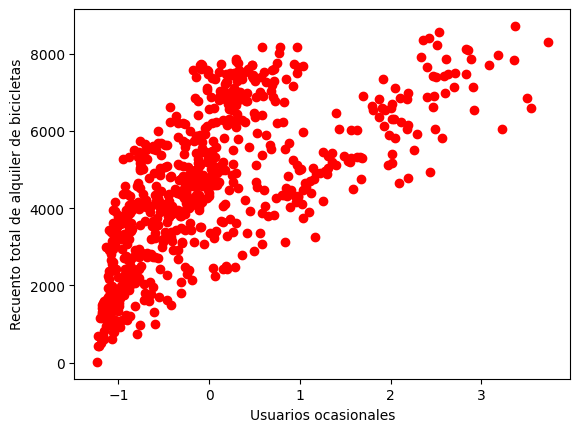

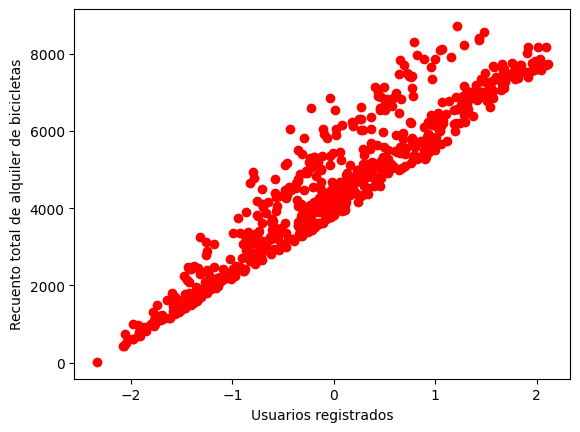

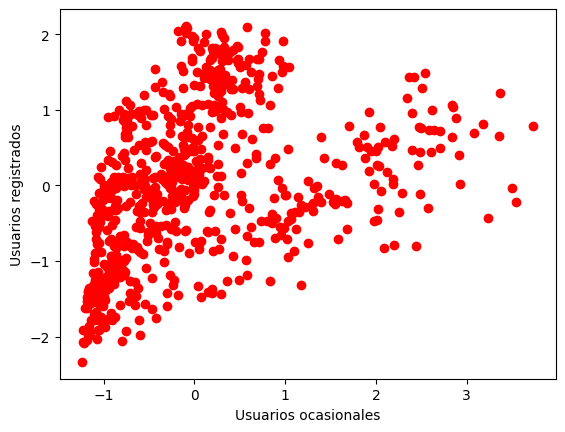

In [ ]:
xlabel1 = "Usuarios ocasionales"
xlabel2 = "Usuarios registrados"
ylabel1 = "Recuento total de alquiler de bicicletas"
graficarDatos(X_norm[:, 13], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 14], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 13], X_norm[:, 14], xlabel1, xlabel2)


In [ ]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
#print(munos.shape)
#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape

In [ ]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [ ]:
theta=np.array([0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1] se obtiene un costo de: 12031287.064018598


In [ ]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [ 4.50780229e+03  5.65190781e+00  4.49284769e+01  1.05347356e+02
  4.49284769e+01 -4.79135442e+01  4.54517217e+00  4.87308279e+00
  1.21590566e+02 -3.43633115e+01  3.60966439e+00  3.97450974e+00
  2.24750239e+00 -1.26986207e+00  7.82034028e+02  1.36507352e+03]
con un costo de: 4115.051600179162 


Text(0, 0.5, 'Costo J')

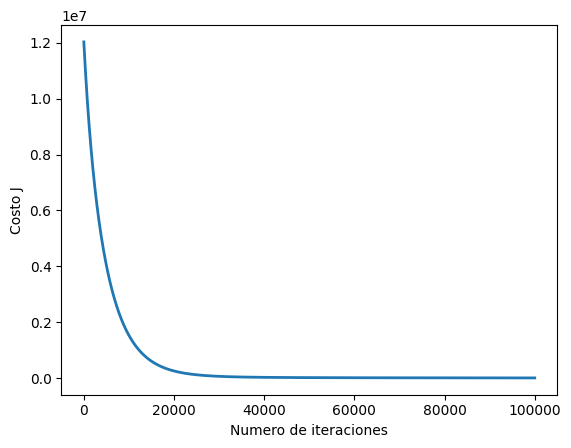

In [ ]:
theta = np.zeros(16)

num_ite = 100000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


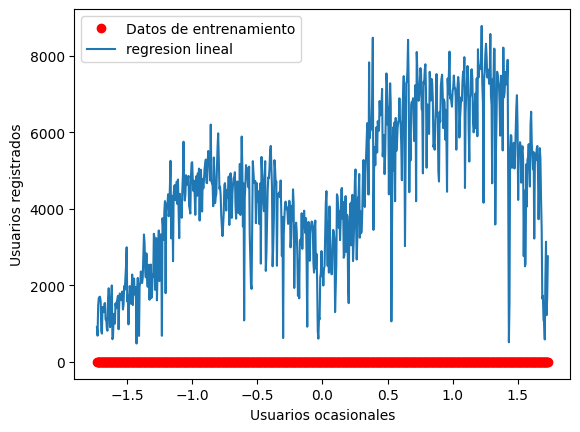

In [ ]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [ ]:
# 2300,4,449900
y_pred = np.dot([1, 2305, 4,1,1,1,1,1,1,1,1,1,1,1,1,1], theta)
print(y_pred)

20069.840847739033


In [ ]:
#Utilizando la ecuacion de la norma

In [ ]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [ ]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [-3.24532574e+05  3.79950486e-02  1.61480098e+02  7.26736005e-10
 -1.63192659e+02  2.55441179e-09 -1.55853996e-10 -5.06306108e-11
  1.28431665e-09 -4.47482801e-10  6.59486618e-18  5.66501723e-17
  3.35187878e-17 -1.29242669e-18  1.00000000e+00  1.00000000e+00]


In [ ]:
X_array = [1, 2305, 4,1,1,1,1,1,1,1,1,1,1,1,1,1]
price = np.dot(X_array, theta) 

print('Prediccion para la renta de bicicletas (usando la ecuación de la normal): ${:.0f}'.format(price))

Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $-323960
